### Пример 1.1.1
#### Проведем прямую 𝑦 = 𝑚 + 𝑏 через экспериментальные точки.

0.9999999999999997 -0.949999999999999


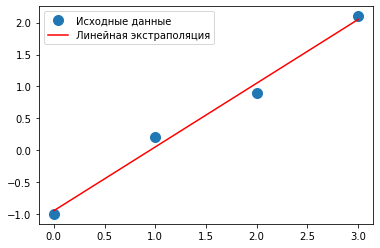

In [103]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T
A

m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

plt.plot(x, y, 'o', label = 'Исходные данные', markersize = 10)
plt.plot(x, m*x + c, 'r', label = 'Линейная экстраполяция')
plt.legend()
plt.show()

### Пример 1.1.2
#### Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в построении эстраполяционного полинома второго порядка (параболы). Таким образом, необходимо найти такие коэффициенты поринома 𝑎, 𝑏, 𝑐 по методу наименьших квадратов. Данные мтогут быть получены в результате измерений. Покажем пример генерации данных случайным образом и загрузки их из файла.

[-5.25268573 -3.96236682 -3.22525623 -1.66917285 -0.96265476  0.19984009
  0.9338788   2.36357805  3.05355681  4.36044949  5.35525689]
[24.56978471 16.3126949   8.5532219   4.05791195  1.06212562 -0.03268117
  1.03420867  3.85033205  8.70646697 16.32857738 25.09643688]


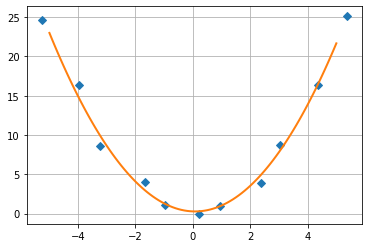

In [104]:
from numpy import *
from numpy.random import *
delta = 1.0
x = linspace(-5, 5, 11)
y = x ** 2 + delta*(rand(11)-0.5)
x += delta * (rand(11)-0.5)

x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

x = fromfile('x_data.txt', float, sep = '\n')
y = fromfile('y_data.txt', float, sep = '\n')

print(x)
print(y)

m = vstack((x ** 2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-5, 5, 101)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')

### Пример 1.1.4
#### По данным предыдущего примера постройте эстраполяционного полинома третьего порядка

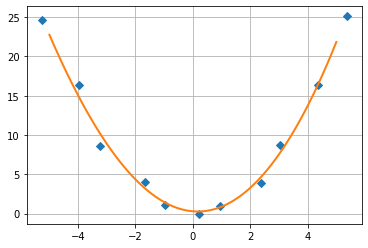

In [105]:
m = vstack((x ** 3, x ** 2, x, ones(11))).T
s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-5, 5, 101)

plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], '-', lw=2)
plt.grid()
plt.savefig('полином 3-й степени.png')

## Задание: 

### Представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени.
### Решение:

-0.11818181818181805 2.727272727272728


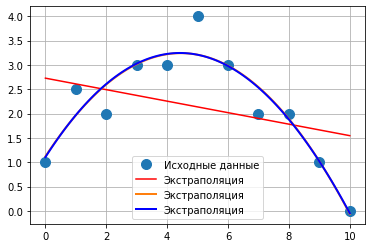

In [106]:
import numpy as np
import scipy as sp
from numpy import *

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]) 
y = np.array([1, 2.5, 2, 3, 3, 4, 3, 2, 2, 1, 0])

A = np.vstack([x, np.ones(len(x))]).T  #Полином 1 степени
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

B = np.vstack([x**2, x, np.ones(len(x))]).T #Полином 2 степени
n = np.linalg.lstsq(B, y, rcond = None)[0]
otr = linspace(0, 10, 101)

D = np.vstack([x**3, x**2, x, np.ones(len(x))]).T #Полином 3 степени
p = np.linalg.lstsq(D, y, rcond = None)[0]

import matplotlib.pyplot as mp
mp.plot(x, y, 'o', label = "Исходные данные", markersize = 10) #Точки
mp.plot(x, m * x + c, 'r', label = "Экстраполяция") #Экстраполяция полиномом 1 степени
mp.plot(otr, n[0] * otr ** 2 + n[1] * otr + n[2], '-', label = "Экстраполяция", lw = 2) #Экстраполяция полиномом 2 степени
mp.plot(otr, p[0] * otr ** 3 + p[1] * otr ** 2 + p[2] * otr + p[3], 'b', label = "Экстраполяция", lw = 2) #Экстраполяция полиномом 3 степени
mp.legend()
mp.grid()
mp.show()

### Пример 1.1.4
#### Необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривую вида 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑒xp(−𝑏2𝑥^2)

0.00018497923501811287
0.09653155221467441


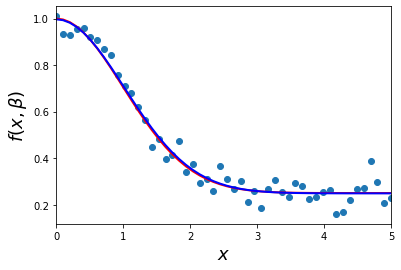

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[1.01001511 0.93342088 0.92790052 0.95623952 0.96041937 0.91919634
 0.90592031 0.87003644 0.84171735 0.75618903 0.70944232 0.6811983
 0.62068628 0.56461792 0.44622197 0.48348708 0.39780434 0.4148252
 0.47330549 0.34028816 0.37325053 0.29510128 0.31153547 0.25696815
 0.36484319 0.31110286 0.26954013 0.30271211 0.21102361 0.26066981
 0.18770431 0.26843276 0.30520725 0.25384588 0.23321548 0.29393666
 0.27967979 0.22528526 0.23144361 0.2528

In [107]:
import scipy as sp

beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x ** 2)

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

from scipy.optimize import curve_fit
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()

print(xdata)
print(ydata)

## Пример 1.1.5
### Необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривые вида:
1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 
2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥^2
3) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1ln(𝑥)
4) 𝑓(𝑥, 𝑏) = 𝑏0 * 𝑥^𝑏1

[0.24739637 0.74612677]
0.00015456650847384728
0.13591193087511574


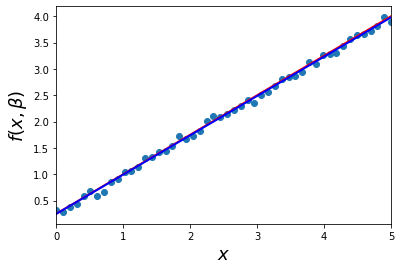

In [108]:
#1
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()


[0.23362583 0.74899687 0.50095298]
0.0001308413940194221
0.10910802770338625


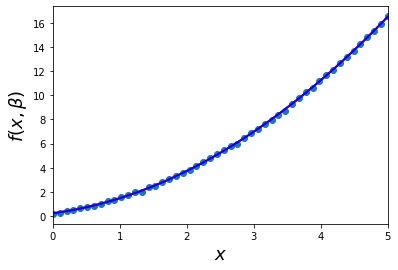

In [109]:
#2
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()


[0.99412715 2.00656976]
4.49353063174559e-05
0.1039102634841876


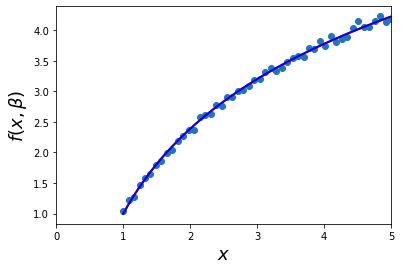

In [110]:
#3
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)

xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()


[0.997875   2.00167377]
5.0842458345038436e-06
0.12193569900301067


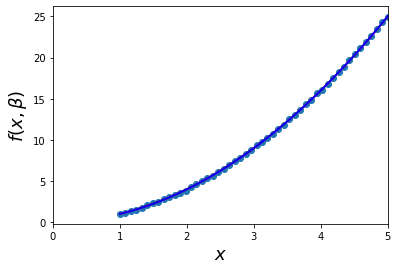

In [52]:
#4
beta = (1, 2)
def f(x, b0, b1):
    return b0 * x ** b1

xdata = np.linspace(1, 5, 50)
y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()


## Задание: 
### Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных. 
### Решение:

[4.9996924  7.99883383 3.01512893]
-8.559625798449404e-07
0.23265560815129807


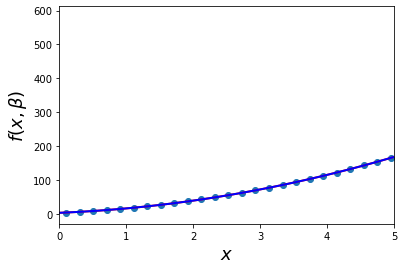

In [111]:
beta = (5, 8, 3)
def f(x, b0, b1, b2):
    return b0 * x ** 2 + b1 * x + b2 

xdata = np.linspace(-10, 10, 100)
y = f(xdata, *beta)

ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw = 2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw = 2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize = 18)
plt.show()


### Пример 1.2.1
#### Задача: Построим простую линейную регрессию в Python с использованием библиотеки scikit-learn

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [141]:
my_dict = {'Учебное время': [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50,4.75, 5.00, 5.50],
           'Оценка': [10, 22, 13, 43, 20, 22, 33, 50, 62, 48, 55, 75, 62, 73, 81, 76, 64, 82, 90, 93]}

dataset = pd.DataFrame(my_dict)
dataset.head()

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [148]:
print(dataset.shape)
dataset.describe()

(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,2.787500,53.700000
std,1.507165,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.625000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


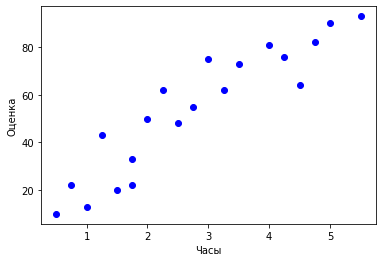

In [149]:
plt.scatter(dataset['Учебное время'], dataset['Оценка'], color = 'b', label = "данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

#### После того как мы получили представление о данных, разделим информацию на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки – это зависимые переменные, значения которых должны быть предсказаны. В нашем наборе всего два столбца и необходимо предсказать оценку в зависимости от количества часов. Чтобы извлечь атрибуты и метки, выполните следующий скрипт:

In [154]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)


[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]


In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [156]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [157]:
print(regressor.intercept_)
print(regressor.coef_)

5.475400029908791
[17.02706744]


#### Получившийся результат можно интерпретировать следующим образом: с каждым затраченным часом на обучение результат экзамена повышается приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы будем использовать наши тестовые данные и посмотрим, насколько точно наш алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на тестовых данных необходимо выполнить следующий код:

In [158]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,90,90.610737
1,22,18.245701
2,93,99.124271
3,62,43.786302


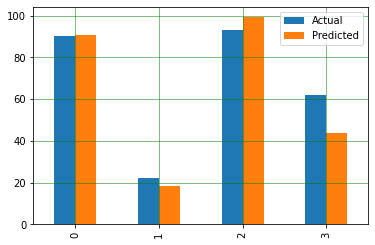

In [159]:
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

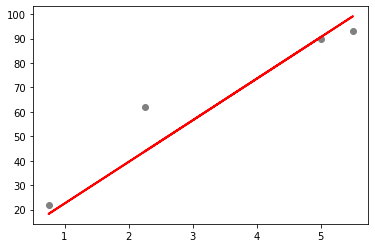

In [160]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

## Задание
#### Постройте модель линейной регрессии для произвольных данных из двух столбцов. Для примера можно взять точечную зависимость заработной платы от опыта работы: (https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv). Найдите коэффициенты линии регрессии. Постройте прогноз.

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [162]:
dict_0 = {'YearsExperience': [1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7, 3.9, 4.0, 4.0, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6.0, 6.8, 7.1, 7.9, 8.2, 8.7, 9.0, 9.5, 9.6, 10.3, 10.5],
          'Salary': [39343.00, 46205.00, 37731.00, 43525.00, 39891.00, 56642.00, 60150.00, 54445.00, 64445.00, 57189.00, 63218.00, 55794.00, 56957.00, 57081.00, 61111.00, 67938.00, 66029.00, 83088.00, 81363.00, 93940.00, 91738.00, 98273.00, 101302.00, 113812.00, 109431.00, 105582.00, 116969.00, 112635.00, 122391.00, 121872.00]}

dataset = pd.DataFrame(dict_0)
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [163]:
print(dataset.shape)
dataset.describe()

(30, 2)


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


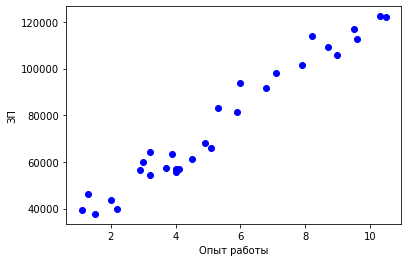

In [164]:
plt.scatter(dataset['YearsExperience'], dataset['Salary'], color = 'b', label = "заработная плата от опыта работы")
plt.xlabel("Опыт работы")
plt.ylabel("ЗП")
plt.show()

In [165]:
#Коэффициенты
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [167]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [168]:
print(regressor.intercept_)
print(regressor.coef_)

26780.099150628186
[9312.57512673]


In [169]:
#Прогноз
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


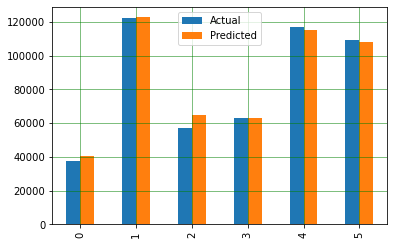

In [170]:
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

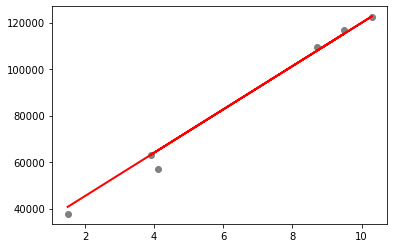

In [171]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

### Пример 1.3.1
#### Для решения задачи множественной регрессии можно задействовать уже известный метод numpy.linalg.lstsq.

In [134]:
import numpy as np
y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4, 5, 6, 0, 6, 3, 1, 3, 1]
X = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5],
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]
X = np.transpose(X)
X = np.c_[X, np.ones(X.shape[0])]
linreg = np.linalg.lstsq(X, y, rcond = None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


### Пример 1.3.2
#### Для данных из предыдущей задачи построить модель множественной линейной регрессии с использованием средств библиотеки sсikit-learn.

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [173]:
y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4, 5, 6, 0, 6, 3, 1, 3, 1]
X = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5],
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]

new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_X = np.array(X)
new_X = new_X.transpose()
df2 = pd.DataFrame(new_X)
df1 = df1.rename(columns = {0: 'y'}, inplace = False)
df2 = df2.rename(columns = {0: 'x1', 1: 'x2', 2: 'x3'}, inplace = False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis = 1, join = "inner")
dataset.head()

,y,x1,x2,x3
0,1,0,4,4
1,2,2,1,1
2,3,4,2,2
3,4,1,3,5
4,3,5,4,6


In [174]:
print(dataset.shape)
dataset.describe()

(23, 4)


,y,x1,x2,x3
count,23.000000,23.000000,23.000000,23.000000
mean,3.565217,5.347826,5.521739,5.043478
std,1.674029,2.404706,2.428422,2.704849
min,0.000000,0.000000,1.000000,1.000000
25%,3.000000,4.500000,4.000000,3.000000
50%,4.000000,5.000000,6.000000,5.000000
75%,5.000000,6.500000,7.500000,7.000000
max,6.000000,9.000000,9.000000,9.000000


In [175]:
X = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [177]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [178]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
x1,0.223219
x2,0.136709
x3,-0.063757


In [179]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
11,5,4.119478
10,4,3.153648
21,3,3.199155
14,4,4.078333
20,1,3.258079


In [180]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 1.3272699242343065


### Задание
#### Постройте модель множественной линейной регрессии для произвольных данных из нескольких столбцов. Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина (1) и (2) соответственно. Найдите коэффициенты множественной регрессии. Постройте прогноз.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import csv

In [3]:
data = "https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv"
file = pd.read_csv(data)
x = file[['pH', 'density',  'alcohol']]
y = file['quality']

In [4]:
new_y = np.array(y)
new_y = new_y.transpose()
dfy = pd.DataFrame(new_y)
new_x = np.array(x)
dfx = pd.DataFrame(new_x)

dfy = dfy.rename(columns = {0: 'quality'}, inplace = False)
dfx = dfx.rename(columns = {0: 'pH', 1: 'density',  2: 'alcohol'}, inplace = False)

frames = [dfy, dfx]
dataset = pd.concat([dfy, dfx], axis=1, join="inner")
dataset.head()

,quality,pH,density,alcohol
0,5,3.51,0.9978,9.4
1,5,3.20,0.9968,9.8
2,5,3.26,0.9970,9.8
3,6,3.16,0.9980,9.8
4,5,3.51,0.9978,9.4


In [5]:
print(dataset.shape)
dataset.describe()

(1599, 4)


,quality,pH,density,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000
mean,5.636023,3.311113,0.996747,10.422983
std,0.807569,0.154386,0.001887,1.065668
min,3.000000,2.740000,0.990070,8.400000
25%,5.000000,3.210000,0.995600,9.500000
50%,6.000000,3.310000,0.996750,10.200000
75%,6.000000,3.400000,0.997835,11.100000
max,8.000000,4.010000,1.003690,14.900000


In [6]:
X = dataset[['pH', 'density', 'alcohol']]
y = dataset['alcohol']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)
#выведем коэффициенты модели
coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
pH,9.974447e-16
density,9.372371e-14
alcohol,1.000000e+00


In [9]:
y_pred = model.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
1109,10.8,10.8
1032,9.6,9.6
1002,11.7,11.7
487,10.0,10.0
979,10.4,10.4
...,...,...
794,12.5,12.5
813,11.4,11.4
1322,11.4,11.4
704,9.7,9.7


In [10]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 1.0255191767873154e-30


### Задание*
#### Экспериментально получены N − значений величины Y приразличных значениях величины X. Определить коэффициенты полиномовпервой и второй степени, аппроксимирующих результаты эксперимента, с применением метода наименьших квадратов. Вычислить СКО. Расчеты проводятся вручную с указанием формул, применяемых для определения коэффициентов и подробных расчетов (сдаются на листке преподавателю, письменный опрос). В тетрадке Jupyter Notebook решение реализуется методами на усмотрение студента. 8 вар.

In [39]:
import pandas as pd
import numpy as np
import scipy as sp
from numpy import *
from sklearn.model_selection import train_test_split


x = np.array([5.0, 5.2, 5.4, 5.6, 5.8, 6.0])
y = np.array([3.0, 2.0, 5.0, 2.0, 2.0, 3.0])

A = np.vstack([x, np.ones(len(x))]).T  #Полином 1 степени
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

-0.42857142857142483 5.190476190476168


In [40]:
#Нахождение коэффициентов методом наим. квадратов
B = np.vstack([x**2, x, np.ones(len(x))]).T #Полином 2 степени
#находим коэффициенты при сост вектора 
n = np.linalg.lstsq(B, y, rcond = None)[0]
print(n)
otr = linspace(0, 10, 1000)

[ -0.89285714   9.39285714 -21.71428571]


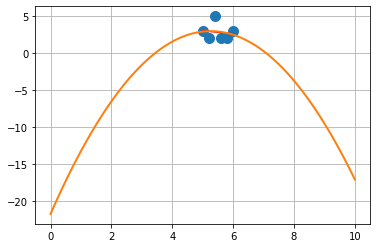

In [41]:
import matplotlib.pyplot as mp
mp.plot(x, y, 'o', label = "Исходные данные", markersize = 10) #Точки
mp.plot(x, m * x + c, 'r', label = "Экстраполяция") #Экстраполяция полиномом 1 степени
mp.plot(otr, n[0] * otr ** 2 + n[1] * otr + n[2], '-', label = "Экстраполяция", lw = 2) #Экстраполяция полиномом 2 степени
mp.grid()
mp.show()

In [43]:
data = {"x": x, "y":y}
dataset = pd.DataFrame(data)
dataset.head()

,x,y
0,5.0,3.0
1,5.2,2.0
2,5.4,5.0
3,5.6,2.0
4,5.8,2.0


In [44]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(x)
print(y)

[[5. ]
 [5.2]
 [5.4]
 [5.6]
 [5.8]
 [6. ]]
[3. 2. 5. 2. 2. 3.]


In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
y_pred = model.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,3.0,1.65
1,5.0,2.25


In [49]:
#Средняя квадр. отклонение(MSE)
from sklearn.metrics import mean_squared_error
from sklearn import metrics

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 4.692500000000001
